In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

# Fetch data from DB

In [2]:
from data import get_enhanced_at_bats
from datetime import datetime

enhanced_at_bats = get_enhanced_at_bats(from_date = datetime(2016, 1, 1))
enhanced_at_bats

Found MongoDB password in MongoDB.txt


xBA    rhb  \
game_date  game_pk home  team opponent at_bat batter pitcher                 
2016-04-03 446873  False NYM  KC       1      434158 450172   0.907  False   
                                       2      431151 450172   0.267   True   
                                       3      493316 450172   0.033   True   
                                       9      446263 450172     NaN  False   
                                       10     435522 450172     NaN  False   
...                                                             ...    ...   
2023-09-13 716607  True  MIN  TB       68     680777 687330   0.014   True   
                                       73     650489 621363   0.001   True   
                                       74     656669 621363     NaN   True   
                                       75     571657 621363   0.251   True   
                                       76     543877 596112     NaN   True   

                                                                rhp  \
game_date  game_pk home  team opponent at_bat batter pitcher          
2016-04-03 446873  False NYM  KC       1      434158 450172    True   
                                       2      431151 450172    True   
                                       3      493316 450172    True   
                                       9      446263 450172    True   
                                       10     435522 450172    True   
...                                                             ...   
2023-09-13 716607  True  MIN  TB       68     680777 687330    True   
                                       73     650489 621363   False   
                                       74     656669 621363   False   
                                       75     571657 621363   False   
                                       76     543877 596112    True   

                                                                 events  \
game_date  game_pk home  team opponent at_bat batter pitcher              
2016-04-03 446873  False NYM  KC       1      434158 450172   field_out   
                                       2      431151 450172   field_out   
                                       3      493316 450172   field_out   
                                       9      446263 450172   strikeout   
                                       10     435522 450172   strikeout   
...                                                                 ...   
2023-09-13 716607  True  MIN  TB       68     680777 687330   field_out   
                                       73     650489 621363   field_out   
                                       74     656669 621363        walk   
                                       75     571657 621363   field_out   
                                       76     543877 596112   strikeout   

                                                              park_factor  \
game_date  game_pk home  team opponent at_bat batter pitcher                
2016-04-03 446873  False NYM  KC       1      434158 450172           103   
                                       2      431151 450172           103   
                                       3      493316 450172           103   
                                       9      446263 450172           103   
                                       10     435522 450172           103   
...                                                                   ...   
2023-09-13 716607  True  MIN  TB       68     680777 687330            99   
                                       73     650489 621363            99   
                                       74     656669 621363            99   
                                       75     571657 621363            99   
                                       76     543877 596112            99   

                                                              opp_sp bats  \
game_date  game_pk home  team opponent at_bat batter pitcher          

# Initialize classifier

In [3]:
from model import BTSBatterClassifier
from sklearn.ensemble import RandomForestClassifier

rf = BTSBatterClassifier(RandomForestClassifier(random_state = 57), at_bats_df = enhanced_at_bats, pkl_name = 'rf')

# Batter per game and per PA aggregations

In [4]:
rf.batter_per_game_agg()

G_last_50G  HG%_last_50G  xHG%_last_50G  PA/G_last_50G  \
game_date  batter                                                           
2016-04-03 407812           0      0.000000       0.000000       0.000000   
           408299           0      0.000000       0.000000       0.000000   
           425877           0      0.000000       0.000000       0.000000   
           429665           0      0.000000       0.000000       0.000000   
           430832           0      0.000000       0.000000       0.000000   
...                       ...           ...            ...            ...   
2023-09-13 691783           3      0.333333       0.000000       4.000000   
           694384          19      0.842105       0.578947       4.631579   
           694497           3      0.666667       0.333333       4.000000   
           696100          12      0.750000       0.333333       3.833333   
           696285          15      0.733333       0.200000       3.933333   

                   BIP/G_last_50G  H/G_last_50G  xH/G_last_50G  
game_date  batter                                               
2016-04-03 407812        0.000000      0.000000       0.000000  
           408299        0.000000      0.000000       0.000000  
           425877        0.000000      0.000000       0.000000  
           429665        0.000000      0.000000       0.000000  
           430832        0.000000      0.000000       0.000000  
...                           ...           ...            ...  
2023-09-13 691783        1.666667      0.333333       0.130000  
           694384        3.210526      1.105263       1.103158  
           694497        2.000000      1.000000       0.892333  
           696100        2.666667      1.000000       0.799833  
           696285        2.933333      0.933333       0.800867  

[298352 rows x 7 columns]

In [5]:
rf.batter_per_pa_agg()

PA_last_200PA  BIP/PA_last_200PA  H/PA_last_200PA  \
game_date  batter                                                      
2016-04-03 407812              0           0.000000         0.000000   
           408299              0           0.000000         0.000000   
           425794              0           0.000000         0.000000   
           425877              0           0.000000         0.000000   
           429665              0           0.000000         0.000000   
...                          ...                ...              ...   
2023-09-13 691783             14           0.428571         0.071429   
           694384             88           0.693182         0.238636   
           694497             14           0.428571         0.214286   
           696100             48           0.687500         0.270833   
           696285             59           0.745763         0.237288   

                   xH/PA_last_200PA  
game_date  batter                    
2016-04-03 407812          0.000000  
           408299          0.000000  
           425794          0.000000  
           425877          0.000000  
           429665          0.000000  
...                             ...  
2023-09-13 691783          0.049286  
           694384          0.238182  
           694497          0.191214  
           696100          0.213000  
           696285          0.203610  

[362539 rows x 4 columns]

# Pitcher and bullpen per BF aggregations

In [6]:
rf.pitcher_per_bf_agg()

BF_last_200BF  K%_last_200BF  BB%_last_200BF  \
game_date  pitcher                                                 
2016-04-03 112526               0       0.000000        0.000000   
           425794               0       0.000000        0.000000   
           434538               0       0.000000        0.000000   
           444436               0       0.000000        0.000000   
           445968               0       0.000000        0.000000   
...                           ...            ...             ...   
2023-09-13 686752             200       0.255000        0.120000   
           687330             200       0.200000        0.080000   
           687922              11       0.181818        0.181818   
           690829              25       0.200000        0.200000   
           690986              86       0.302326        0.093023   

                    H/PA_last_200BF  xH/PA_last_200BF  
game_date  pitcher                                     
2016-04-03 112526          0.000000          0.000000  
           425794          0.000000          0.000000  
           434538          0.000000          0.000000  
           444436          0.000000          0.000000  
           445968          0.000000          0.000000  
...                             ...               ...  
2023-09-13 686752          0.160000          0.180515  
           687330          0.195000          0.219550  
           687922          0.272727          0.262818  
           690829          0.200000          0.175800  
           690986          0.220930          0.222360  

[152034 rows x 5 columns]

In [7]:
rf.bullpen_per_bf_agg()

BF_last_200BF  K%_last_200BF  BB%_last_200BF  \
game_date  opponent                                                 
2016-04-03 KC                    0          0.000           0.000   
           NYM                   0          0.000           0.000   
           PIT                   0          0.000           0.000   
           STL                   0          0.000           0.000   
           TB                    0          0.000           0.000   
...                            ...            ...             ...   
2023-09-13 STL                 200          0.190           0.115   
           TB                  200          0.325           0.055   
           TEX                 200          0.215           0.120   
           TOR                 200          0.245           0.100   
           WSH                 200          0.170           0.080   

                     H/PA_last_200BF  xH/PA_last_200BF  
game_date  opponent                                     
2016-04-03 KC                  0.000           0.00000  
           NYM                 0.000           0.00000  
           PIT                 0.000           0.00000  
           STL                 0.000           0.00000  
           TB                  0.000           0.00000  
...                              ...               ...  
2023-09-13 STL                 0.225           0.19990  
           TB                  0.150           0.17187  
           TEX                 0.255           0.21147  
           TOR                 0.220           0.19859  
           WSH                 0.230           0.23903  

[34341 rows x 5 columns]

# Fit classifier

Score on training data: 1.0
Score on testing data: 0.64


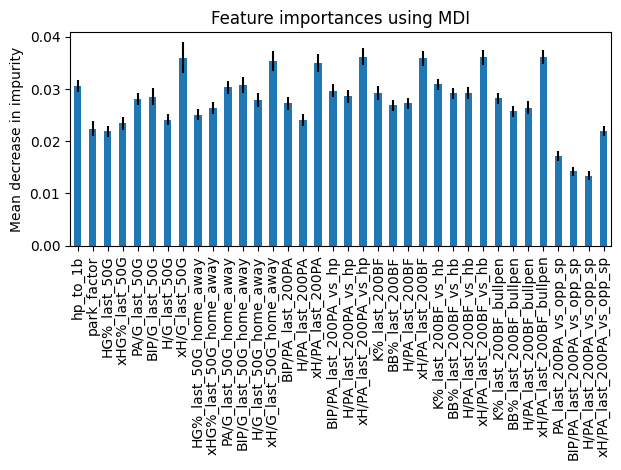

In [8]:
import numpy as np
import matplotlib.pyplot as plt

rf.fit_model(scale_features = True, perform_pca = False)
feature_importances = rf.clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.clf.estimators_], axis = 0)

forest_importances = pd.Series(feature_importances, index = rf.X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr = std, ax = ax)
ax.set_title('Feature importances using MDI')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

# Simulate results on test data

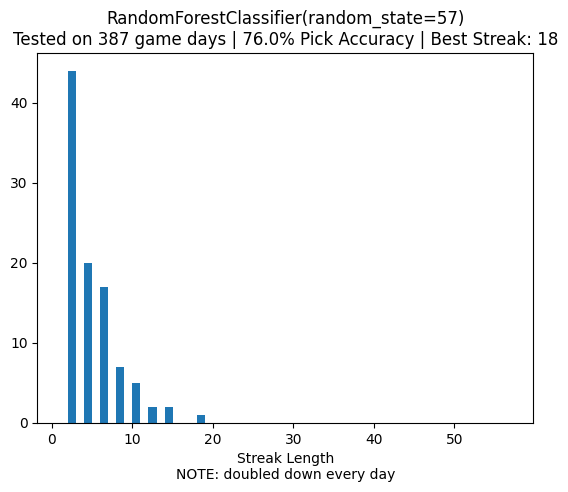

In [9]:
rf.simulate_results()

# Get predictions for today

In [10]:
todays_predictions = rf.todays_predictions()
todays_predictions

GET https://statsapi.mlb.com/api/v1/schedule?lang=en&sportId=1&gameType=R&date=2023-09-14 (200) 0.22s
GET https://baseballsavant.mlb.com/leaderboard/statcast-park-factors?type=venue&stat=index_Hits (200) 0.07s
GET https://www.mlb.com/apps/beat-the-streak/game/json/units.json (200) 0.19s
GET https://www.mlb.com/apps/beat-the-streak/game/json/squads.json (200) 0.17s
GET https://www.mlb.com/apps/beat-the-streak/game/json/players.json (200) 0.13s


game_time  lineup  \
game_date  game_pk home  team opponent batter                               
2023-09-14 716593  True  BOS  NYY      457759 2023-09-14 19:10:00       0   
           716591  True  PIT  WSH      663647 2023-09-14 12:30:00      10   
           716581  False SF   COL      642731 2023-09-14 20:35:00       0   
           716587  True  TOR  TEX      593160 2023-09-14 19:02:00       0   
           716581  True  COL  SF       592178 2023-09-14 20:35:00       0   
...                                                           ...     ...   
           716584  True  DET  CIN      608348 2023-09-14 13:05:00      10   
           716586  True  BAL  TB       602104 2023-09-14 19:10:00       0   
           716580  True  CWS  MIN      572204 2023-09-14 19:35:00       0   
           716588  False AZ   NYM      664874 2023-09-14 16:05:00       0   
           716587  False TEX  TOR      595978 2023-09-14 19:02:00       0   

                                                          name bats  opp_sp  \
game_date  game_pk home  team opponent batter                                 
2023-09-14 716593  True  BOS  NYY      457759    Justin Turner    R  657376   
           716591  True  PIT  WSH      663647   Ke'Bryan Hayes    R  680686   
           716581  False SF   COL      642731   Thairo Estrada    R  502624   
           716587  True  TOR  TEX      593160  Whit Merrifield    R  543135   
           716581  True  COL  SF       592178      Kris Bryant    R  657277   
...                                                        ...  ...     ...   
           716584  True  DET  CIN      608348     Carson Kelly    R  571882   
           716586  True  BAL  TB       602104      Ramón Urías    R  650644   
           716580  True  CWS  MIN      572204  Trayce Thompson    R  628317   
           716588  False AZ   NYM      664874      Seby Zavala    R  673540   
           716587  False TEX  TOR      595978    Austin Hedges    R  592332   

                                                  opp_sp_name throws  \
game_date  game_pk home  team opponent batter                          
2023-09-14 716593  True  BOS  NYY      457759  Clarke Schmidt      R   
           716591  True  PIT  WSH      663647     Josiah Gray      R   
           716581  False SF   COL      642731  Chase Anderson      R   
           716587  True  TOR  TEX      593160  Nathan Eovaldi      R   
           716581  True  COL  SF       592178      Logan Webb      R   
...                                                       ...    ...   
           716584  True  DET  CIN      608348       Derek Law      R   
           716586  True  BAL  TB       602104    Aaron Civale      R   
           716580  True  CWS  MIN      572204     Kenta Maeda      R   
           716588  False AZ   NYM      664874     Kodai Senga      R   
           716587  False TEX  TOR      595978   Kevin Gausman      R   

                                               park_factor  hp_to_1b    H%  
game_date  game_pk home  team opponent batter                               
2023-09-14 716593  True  BOS  NYY      457759          111      4.82  0.79  
           716591  True  PIT  WSH      663647          103      4.53  0.76  
           716581  False SF   COL      642731          115      4.33  0.76  
           716587  True  TOR  TEX      593160          100      4.30  0.76  
           716581  True  COL  SF       592178          115      4.58  0.75  
...                                                    ...       ...   ...  
           716584  True  DET  CIN      608348           98      4.78  0.47  
           716586  True  BAL  TB       602104          105      4.63  0.47  
           716580  True  CWS  MIN      572204           99      4.52  0.42  
           716588  False AZ   NYM      664874           94      4.62  0.42  
           716587  False TEX  TOR      595978          100      5.02  0.41  

[133 rows x 10 columns]